In [1]:
import glob
import os
import pandas as pd
def get_gray_matter_df_for_model(filepath,output_csv_path):
        df = pd.read_csv(filepath)
        df1 = df.query('istumor == 1')
        xyz_df_v2 = df1
        xy_df_v2 = pd.DataFrame()
        xyz_df_v2 = pd.DataFrame()
        for tloc in range(0,len(df1)):
            for i in range(1,6):
                xy_n_df = df[(df['X'].isin([df1.X.iloc[tloc]])) & (df['pY'].isin([df1.pY.iloc[tloc]-i])) & (df['Z'].isin([df1.Z.iloc[tloc]]))]
                xy_p_df = df[(df['X'].isin([df1.X.iloc[tloc]])) & (df['pY'].isin([df1.pY.iloc[tloc]+i])) & (df['Z'].isin([df1.Z.iloc[tloc]]))]
                #print([df1.X.iloc[0]],[df1.pY.iloc[0]-i],[df1.pY.iloc[0]+i])
                xy_df_v2 = pd.concat([xy_df_v2,xy_n_df,xy_p_df])
            for loc in range(0,len(xy_df_v2)):
                for j in range(1,6):
                    #print("the value of j is {}".format(j))
                    xyz_n_df = df[(df['X'].isin([xy_df_v2.X.iloc[loc]])) & (df.pY.isin([xy_df_v2.pY.iloc[loc]])) & (df['Z'].isin([xy_df_v2.Z.iloc[loc]-j]))]
                    xyz_p_df = df[(df['X'].isin([xy_df_v2.X.iloc[loc]])) & (df.pY.isin([xy_df_v2.pY.iloc[loc]])) & (df['Z'].isin([xy_df_v2.Z.iloc[loc]+j]))]       
                    xyz_df_v2 = pd.concat([xyz_df_v2,xyz_n_df,xyz_p_df])
            #print(xyz_df_v2.Z)
        #print(xy_df_v2.X,xy_df_v2.pY,xy_df_v2.Z)
        #print(df.query('istumor == 1'))
        xyz_df_v2 = pd.concat([xyz_df_v2,df1])
        xyz_df_v2 = xyz_df_v2.drop_duplicates()
        #print(xyz_df_v2)
        #'C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_gray_matter_csv/'
        return xyz_df_v2

In [2]:
csv_files = []
input_csv_path = "C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Training_Data_v2_csv/"
for root, directories, files in  os.walk(input_csv_path, topdown=False):
    for file in files:
        csv_files.append(file)
csv_files

for file in csv_files:
    if file == 'BraTSReg_001_00_0000_flai_values.csv':
        filename = input_csv_path + file
        print(filename)
        df = pd.read_csv(filename)
        df1 = df.query('istumor == 1')
        #xyz_df_v2 = df1
        y_df_v2 = pd.DataFrame()
        yz_df_v2 = pd.DataFrame()
        xyz_df_v2 = pd.DataFrame()
        for tloc in range(0,len(df1)):
            for i in range(1,4):
                y_n_df = df[(df['X'].isin([df1.X.iloc[tloc]])) & (df['pY'].isin([df1.pY.iloc[tloc]-i])) & (df['Z'].isin([df1.Z.iloc[tloc]]))]
                y_p_df = df[(df['X'].isin([df1.X.iloc[tloc]])) & (df['pY'].isin([df1.pY.iloc[tloc]+i])) & (df['Z'].isin([df1.Z.iloc[tloc]]))]
                #print([df1.X.iloc[0]],[df1.pY.iloc[0]-i],[df1.pY.iloc[0]+i])
                y_df_v2 = pd.concat([y_df_v2,y_n_df,y_p_df])
            #print(len(y_df_v2))
            for loc in range(0,len(y_df_v2)):
                for j in range(1,4):
                    #print("the value of j is {}".format(j))
                    yz_n_df = df[(df['X'].isin([y_df_v2.X.iloc[loc]])) & (df['pY'].isin([y_df_v2.pY.iloc[loc]])) & (df['Z'].isin([y_df_v2.Z.iloc[loc]-j]))]
                    yz_p_df = df[(df['X'].isin([y_df_v2.X.iloc[loc]])) & (df['pY'].isin([y_df_v2.pY.iloc[loc]])) & (df['Z'].isin([y_df_v2.Z.iloc[loc]+j]))]       
                    yz_df_v2 = pd.concat([yz_df_v2,yz_n_df,yz_p_df])
        for xloc in range(0,len(yz_df_v2)):
        #print([yz_df_v2.X.iloc[xloc]-1])
            for k in range(1,4):
            #print("the value of j is {}".format(j))
                xyz_n_df = df[(df['X'].isin([yz_df_v2.X.iloc[xloc]-k])) & (df['pY'].isin([yz_df_v2.pY.iloc[xloc]])) & (df['Z'].isin([yz_df_v2.Z.iloc[xloc]]))]
                #print(xyz_n_df)
                xyz_p_df = df[(df['X'].isin([yz_df_v2.X.iloc[xloc]+k])) & (df['pY'].isin([yz_df_v2.pY.iloc[xloc]])) & (df['Z'].isin([yz_df_v2.Z.iloc[xloc]]))]
                #print(xyz_p_df)
                xyz_df_v2 = pd.concat([xyz_df_v2,xyz_n_df,xyz_p_df])
        gray_df_v2 = pd.concat([xyz_df_v2,yz_df_v2,df1])
        gray_df_v2.drop_duplicates().to_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_gray_matter_csv/'+ gray_df_v2.NiiFileName.iloc[0] + '_gray_matter_001.csv', index=False)    #print(len(yz_df_v2))

C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Training_Data_v2_csv/BraTSReg_001_00_0000_flai_values.csv


KeyboardInterrupt: 

In [19]:
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_gray_matter_csv/BraTSReg_001_00_0000_flair.nii.gz_gray_matter_001.csv')
istumor_df = df.query('istumor == 1')
print(istumor_df.query('Z == 70'))
#df.query('Z == 70').describe

      Unnamed: 0    X   pY  VoxVal   Z                        NiiFileName  \
1396       33991  151  141   453.0  70  BraTSReg_001_00_0000_flair.nii.gz   

                       LandmarksFileName  istumor  
1396  BraTSReg_001_00_0000_landmarks.csv        1  


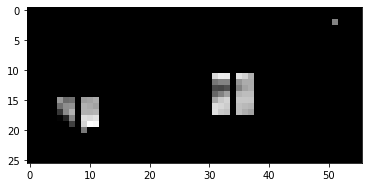

In [20]:

img_df = df.query('Z == 70')
sparse_image = coo_matrix((img_df.VoxVal, (img_df.X,img_df.pY)), shape = (240,240))
image = sparse_image.todense()
#
plt.imshow(image[149:175,90:146], interpolation='nearest',cmap = 'gray')
plt.show()

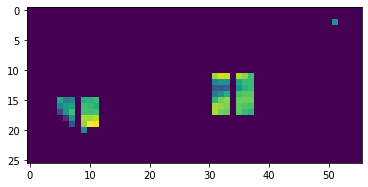

In [21]:
plt.imshow(image[149:175,90:146], interpolation='nearest')
plt.show()

In [22]:

df1 = pd.read_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_gray_matter_csv/BraTSReg_001_00_0000_t1ce.nii.gz_gray_matter.csv')
istumor_df1 = df1.query('istumor == 1')
print(istumor_df1.query('Z == 70'))
df1.query('Z == 70').describe

      Unnamed: 0    X   pY  VoxVal   Z                       NiiFileName  \
1396       33991  151  141  2004.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   

                       LandmarksFileName  istumor  
1396  BraTSReg_001_00_0000_landmarks.csv        1  


<bound method NDFrame.describe of       Unnamed: 0    X   pY  VoxVal   Z                       NiiFileName  \
646        29682  162  123   791.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
647        29684  164  123   858.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
648        29681  161  123  1106.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
649        29685  165  123   860.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
650        29680  160  123   881.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
...          ...  ...  ...     ...  ..                               ...   
1332       23207  167   96   379.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
1338       24167  167  100   903.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
1344       22967  167   95    41.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
1350       24407  167  101   549.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   
1396       33991  151  141  2004.0  70  BraTSReg_001_00_0000_t1ce.nii.gz   

                       LandmarksFileName  istumor  
6

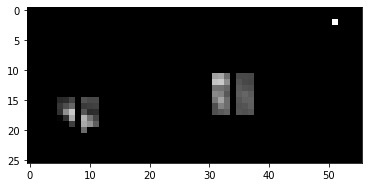

In [23]:
img_df = df1.query('Z == 70')
sparse_image = coo_matrix((img_df.VoxVal, (img_df.X,img_df.pY)), shape = (240,240))
image = sparse_image.todense()
#
plt.imshow(image[149:175,90:146], interpolation='nearest',cmap = 'gray')
plt.show()

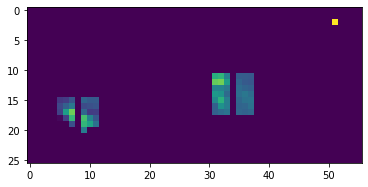

In [24]:
plt.imshow(image[149:175,90:146], interpolation='nearest')
plt.show()

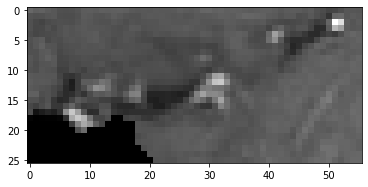

In [27]:
df2 = pd.read_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Training_Data_v2_csv/BraTSReg_001_00_0000_t1ce_values.csv')
img_df = df2.query('Z == 70')
sparse_image = coo_matrix((img_df.VoxVal, (img_df.X,img_df.pY)), shape = (240,240))
image = sparse_image.todense()
#
plt.imshow(image[149:175,90:146], interpolation='nearest',cmap = 'gray')
plt.show()

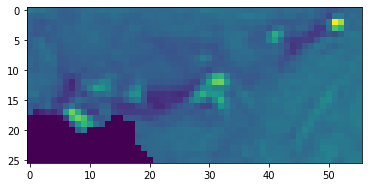

In [28]:
plt.imshow(image[149:175,90:146], interpolation='nearest')
plt.show()

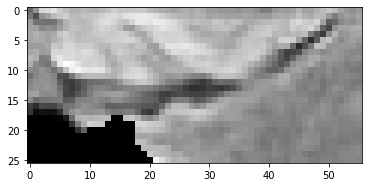

In [29]:
df3 = pd.read_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Training_Data_v2_csv/BraTSReg_001_00_0000_flai_values.csv')
img_df = df3.query('Z == 70')
sparse_image = coo_matrix((img_df.VoxVal, (img_df.X,img_df.pY)), shape = (240,240))
image = sparse_image.todense()
#
plt.imshow(image[149:175,90:146], interpolation='nearest',cmap = 'gray')
plt.show()

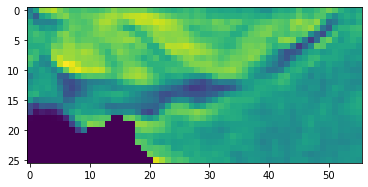

In [30]:
plt.imshow(image[149:175,90:146], interpolation='nearest')
plt.show()

In [37]:
df = pd.read_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Training_Data_v2_csv/BraTSReg_001_00_0000_t1ce_values.csv')
df1 = df.query('istumor == 1')
print(df1)
#xyz_df_v2 = df1
y_df_v2 = pd.DataFrame()
yz_df_v2 = pd.DataFrame()
xyz_df_v2 = pd.DataFrame()
for tloc in range(0,len(df1)):
    for i in range(1,4):
        y_n_df = df[(df['X'].isin([df1.X.iloc[tloc]])) & (df['pY'].isin([df1.pY.iloc[tloc]-i])) & (df['Z'].isin([df1.Z.iloc[tloc]]))]
        y_p_df = df[(df['X'].isin([df1.X.iloc[tloc]])) & (df['pY'].isin([df1.pY.iloc[tloc]+i])) & (df['Z'].isin([df1.Z.iloc[tloc]]))]
        #print([df1.X.iloc[0]],[df1.pY.iloc[0]-i],[df1.pY.iloc[0]+i])
        y_df_v2 = pd.concat([y_df_v2,y_n_df,y_p_df])
    #print(len(y_df_v2))
    for loc in range(0,len(y_df_v2)):
        for j in range(1,4):
            #print("the value of j is {}".format(j))
            yz_n_df = df[(df['X'].isin([y_df_v2.X.iloc[loc]])) & (df['pY'].isin([y_df_v2.pY.iloc[loc]])) & (df['Z'].isin([y_df_v2.Z.iloc[loc]-j]))]
            yz_p_df = df[(df['X'].isin([y_df_v2.X.iloc[loc]])) & (df['pY'].isin([y_df_v2.pY.iloc[loc]])) & (df['Z'].isin([y_df_v2.Z.iloc[loc]+j]))]       
            yz_df_v2 = pd.concat([yz_df_v2,yz_n_df,yz_p_df])
for xloc in range(0,len(yz_df_v2)):
#print([yz_df_v2.X.iloc[xloc]-1])
    for k in range(1,4):
    #print("the value of j is {}".format(j))
        xyz_n_df = df[(df['X'].isin([yz_df_v2.X.iloc[xloc]-k])) & (df['pY'].isin([yz_df_v2.pY.iloc[xloc]])) & (df['Z'].isin([yz_df_v2.Z.iloc[xloc]]))]
        #print(xyz_n_df)
        xyz_p_df = df[(df['X'].isin([yz_df_v2.X.iloc[xloc]+k])) & (df['pY'].isin([yz_df_v2.pY.iloc[xloc]])) & (df['Z'].isin([yz_df_v2.Z.iloc[xloc]]))]
        #print(xyz_p_df)
        xyz_df_v2 = pd.concat([xyz_df_v2,xyz_n_df,xyz_p_df])
gray_df_v2 = pd.concat([xyz_df_v2,yz_df_v2,df1])
gray_df_v2.drop_duplicates().to_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_gray_matter_csv/'+ gray_df_v2.NiiFileName.iloc[0] + '_gray_matter_001.csv', index=False)    #print(len(yz_df_v2))

        Unnamed: 0    X   pY  VoxVal   Z                        NiiFileName  \
321579       25333  133  105   318.0  51  BraTSReg_001_00_0000_flair.nii.gz   
361859       23161  121   96   408.0  54  BraTSReg_001_00_0000_flair.nii.gz   
420076       24864  144  103   425.0  58  BraTSReg_001_00_0000_flair.nii.gz   
563282       29923  163  124   536.0  67  BraTSReg_001_00_0000_flair.nii.gz   
593367       23687  167   98   785.0  69  BraTSReg_001_00_0000_flair.nii.gz   
614905       33991  151  141   453.0  70  BraTSReg_001_00_0000_flair.nii.gz   

                         LandmarksFileName  istumor  
321579  BraTSReg_001_00_0000_landmarks.csv        1  
361859  BraTSReg_001_00_0000_landmarks.csv        1  
420076  BraTSReg_001_00_0000_landmarks.csv        1  
563282  BraTSReg_001_00_0000_landmarks.csv        1  
593367  BraTSReg_001_00_0000_landmarks.csv        1  
614905  BraTSReg_001_00_0000_landmarks.csv        1  


KeyboardInterrupt: 